# Loan Approval Analysis: Factors Affecting Approval

# Task: Determine the eligibility for granting Home loan.
Objective of this notebook is:

*   To understand the patterns in the data.
*   How to Handle the categorical features.
*   How to deal with missing data.
*   Feature Engineering
*   Finding the most important features while taking the decision of granting a loan application.

# Load data and libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget "https://docs.google.com/uc?export=download&id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w" -O train.csv

--2025-07-25 06:54:53--  https://docs.google.com/uc?export=download&id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w
Resolving docs.google.com (docs.google.com)... 172.253.117.139, 172.253.117.113, 172.253.117.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w&export=download [following]
--2025-07-25 06:54:53--  https://drive.usercontent.google.com/download?id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>]  37.12K  --.-KB/s    in 0s

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.shape

(614, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We see that Dependents variable is an object, but in the above table, we see that the entries are integers. Lets check the entries of this variable.

In [8]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


So we infer that due to the entry 3+, this variable is a string rather than an integer datatype.

Now, to make the table simpler, let's drop the loan ID column as it is not a variable of much importance when it comes to the main object of finding the eligibility of granting loan.

In [9]:
data = data.drop('Loan_ID', axis = 1)

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Basic Data Exploration

Let's check the statistics of the data, both numeric and categorical.

In [11]:
data.describe()   #for the numeric features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data.describe(include = 'object')   #for the categorical features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


As we see the count of each numeric and categorical variables, we notice some missing values, as total rows present are 614 and some of the counts are not complete.

We can check the total missing values using data.isna().sum() function

In [13]:
data.isna().sum()   #sum of total missing values per column

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Now we can sagregate numeric and categorical columns into seperate distinct variables.

In [14]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
data[cat_cols].head()   #seeing only the categorical columns

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [17]:
data[num_cols].head()   #seeing only the numeric columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# Basic Data Visualization

In [18]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


We see that the number of loans approved is 422 and rejected is 192

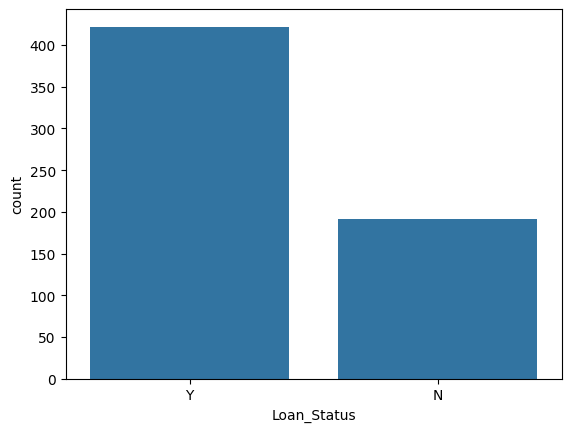

In [19]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

Now let us make a distribution plot and box plot representing the applicants income.

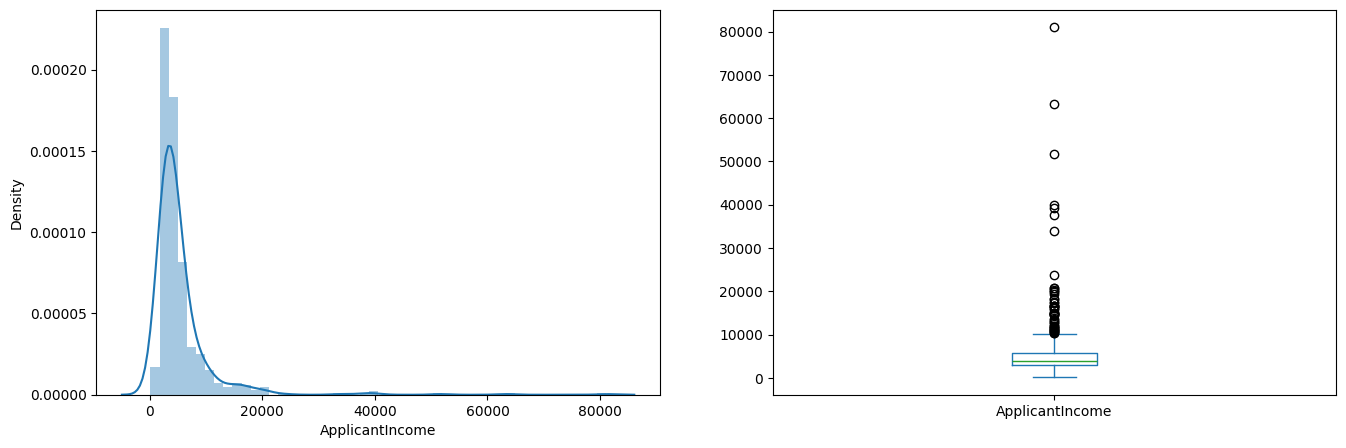

In [20]:
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

From the above plots, we infer the following:


*   The distribution curve is positively skewed, with a large number of outliers above the income of 20000 (in Rs)
*   From the box plot it is clear that outliers reach till more than 80000 (Rs).
*   Maximum distribution concentrates between 0 - 20000.


To normalize the above plots, we can plot the log of the distribution curves, as displayed below.

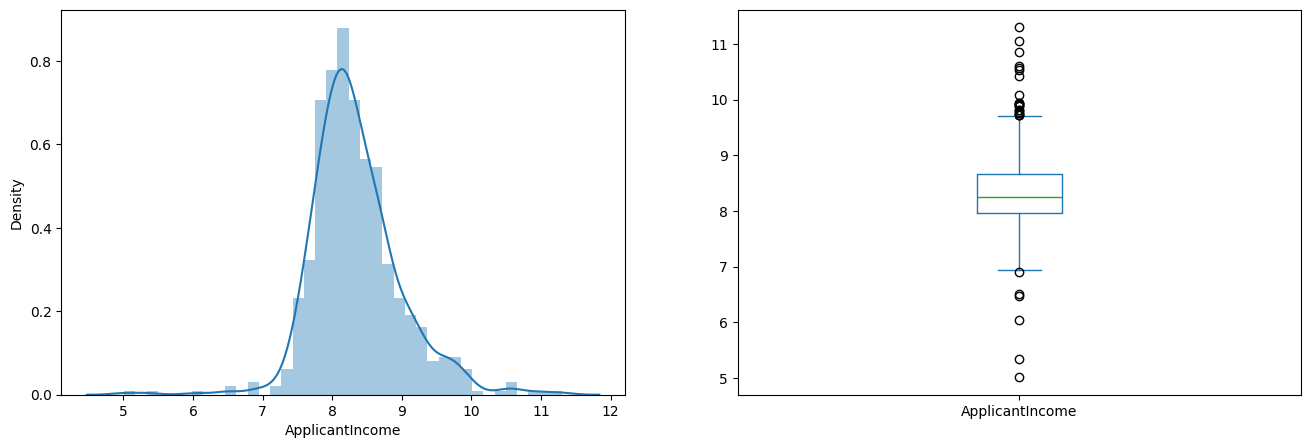

In [21]:
plt.subplot(121)
sns.distplot(np.log(data["ApplicantIncome"]))

plt.subplot(122)
np.log(data["ApplicantIncome"]).plot.box(figsize=(16,5))
plt.show()

In [22]:
np.log(5000)

np.float64(8.517193191416238)

By taking the log of applicant income and creating new normal distribution curve and box plot curve, we have normalized the plots. It'll be helpful for statistical models which require normally distributed data.



*   In the normally distributed data, the interpretation of values in the x-axis has changed. We no longer see the raw income values directly, but their logarithms.
*   As shown in the above code, log of 5000 is 8.51 approx.
*   Statistical models and ML algorithm perform better when input features are normally distributed.
*   Log transformation can also help to reduce the impact of outliers in highly skewed data



Now, we can slice the same data with respect to education of applicants.

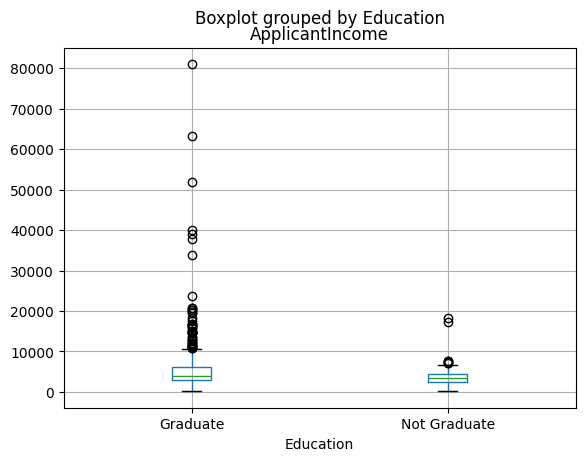

In [23]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.show()

We can see that:


*   Applicants who are graduates have the most outliers as compared to non-graduates.
*   Graduates, though concentrated at average roughly around 5000, have significant concentrations between 10000 - 20000. Outliers present above 30000 also.
*   Non-graduates average mostly below 5000, with very less outliers, only upto 20000.



Now lets plot distribution and box plots for co-applicant income.

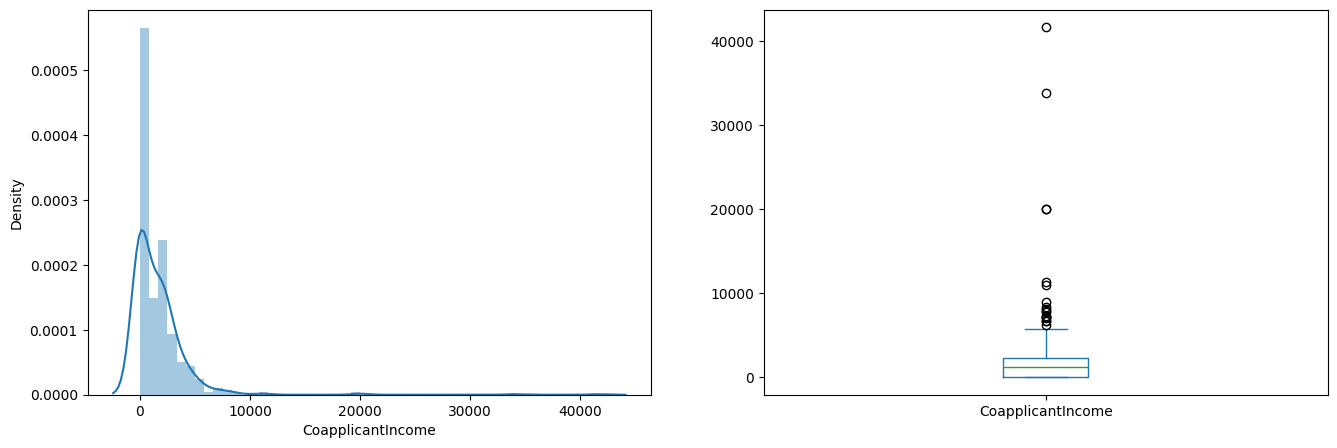

In [24]:
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see that coapplicant income largely concentrates below the range of 5000, though concentration is significant only till 10000.


Outliers present uptill around 45000.

Now lets see the loan status with respect to the income of applicants, co-applicants and total income.

In [25]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

,ApplicantIncome
Loan_Status,
N,5446.078125
Y,5384.068720


We see that the loan is rejected for applicants having higher average income than the opposite. We have to see for that in details.

Let's categorize the income ammounts into bins.

# Simple Feature Engineering

We've first divided the Applicants' income into seperate bins.

In [26]:
bins=[0,2500,5000,7500, 10000, 20000, 40000, 60000, 85000]
group=['low','low1','low2','low3','avg1','avg2','high','very high']
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,low2
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,low1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,low1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,low1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,low2


In [28]:
pd.crosstab(data['Income_bin'], data['Loan_Status'])

Loan_Status,N,Y
Income_bin,,
low,34,74
low1,99,216
low2,31,67
low3,11,30
avg1,13,27
avg2,3,6
high,0,1
very high,1,1


Here we see the loan status with respect to the respective income bins.

We clearly see that the number of loans getting approved for each bin is more than the number of loans getting rejected.

avg2, high and very high are outliers.


Also finding the percentages of loan status by each bins as displayed below.

In [29]:
pd.crosstab(data['Income_bin'], data['Loan_Status'], normalize='index')*100

Loan_Status,N,Y
Income_bin,,
low,31.481481,68.518519
low1,31.428571,68.571429
low2,31.632653,68.367347
low3,26.829268,73.170732
avg1,32.500000,67.500000
avg2,33.333333,66.666667
high,0.000000,100.000000
very high,50.000000,50.000000


Similarly we can plot a bar graph for thew same to view the figures more visually.

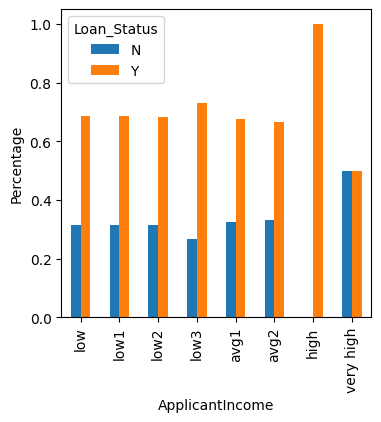

In [30]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

We can infer from above insights that:


*   loan approval number is generally higher across all the income groups. Indicates that more applicants get approved regardless of their income group.
*   From income bin low to avg2, the approval percentage remains relatively stable around 70%.
*   Bin high and very high are outliers in our case, high showing 100% approval and very high showing 50%.
*   Suggests that higher income doesn't always guarantee loan approval.



We infer that applicant income alone doesn't affect the chances of loan approval.

We have to check for co-applicant income as well.

In [31]:
#co-applicant income
bins = [0,4000,10000,45000]
group = ['low','avg','high']
data['Coapplicant_Income_bin'] = pd.cut(data['CoapplicantIncome'],bins,labels=group)

In [32]:
pd.crosstab(data['Coapplicant_Income_bin'], data['Loan_Status'])

Loan_Status,N,Y
Coapplicant_Income_bin,,
low,77,209
avg,14,35
high,5,1


In [33]:
pd.crosstab(data['Coapplicant_Income_bin'], data['Loan_Status'], normalize='index')*100

Loan_Status,N,Y
Coapplicant_Income_bin,,
low,26.923077,73.076923
avg,28.571429,71.428571
high,83.333333,16.666667


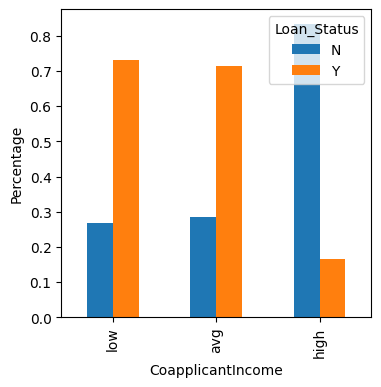

In [34]:
CoapplicantIncome_Bin = pd.crosstab(data["Coapplicant_Income_bin"],data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(axis = 1),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

Here we see a significant change:


*   Coapplicants with income under 10000 (low and avg) have a stable loan approval percentage, low being 73% and avg being 71%.
*   Coapplicant with high income (10k to 45k) have a surprisingly low loan approval rate at 16%. Also due to high income having 6 total entries, making it outlier.
*   Majority of coapplicants fall in the low income bin.



An anomaly arrises indicating whether coapplicant income alone also affects the chance of loan approval.

In [35]:
data['CoapplicantIncome'].value_counts()

,count
CoapplicantIncome,
0.0,273
1666.0,5
2083.0,5
2500.0,5
1625.0,3
...,...
2816.0,1
1083.0,1
3021.0,1


We clearly see that majority of coapplicants (273) out of 614 have no income. While others are simply outliers, having very less individuals in the non-zero ranges.

Insights from avg and high coapplicant income are thus statistically weak.

We'll create a new feature, concating applicants and coapplicants income

In [36]:
#New feature: total household income
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [37]:
bins = [0, 4000, 8000, 15000, 85000]
group = ['low', 'avg', 'high', 'very high']
data['TotalIncome_bin'] = pd.cut(data['TotalIncome'], bins, labels=group)

In [38]:
pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'])

Loan_Status,N,Y
TotalIncome_bin,,
low,46,97
avg,104,235
high,28,68
very high,14,22


In [39]:
pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'], normalize='index')*100

Loan_Status,N,Y
TotalIncome_bin,,
low,32.167832,67.832168
avg,30.678466,69.321534
high,29.166667,70.833333
very high,38.888889,61.111111


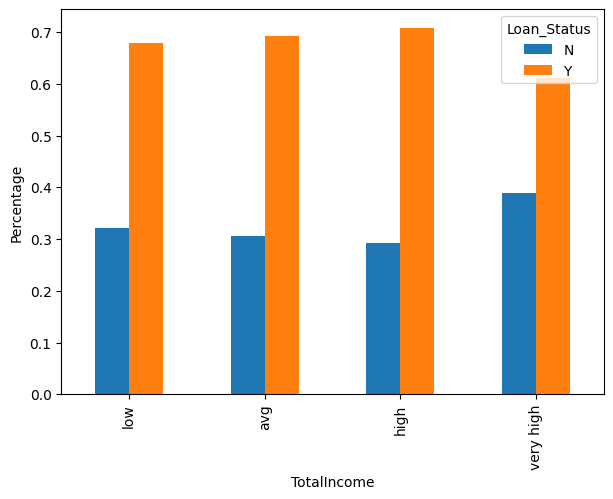

In [40]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Observations:


*   Merging applicants and coapplicants income together, we see that higher number of applicants fall under the average income bin (4k to 8k).
*   Approve rate seen generally increasing from low to avg to high. Simultaneously, rejection rate gradually falls for the same.
*   Approval rate dips in very high income bin, but might not indicate actual trend, due to:
    *   result being of fewer data points (36)
    *   very high bin thus falling into outliers.

*   We can infer that loan approval rate tends to be higher with increasing income.





In [41]:
data = data.drop(["Income_bin","Coapplicant_Income_bin","TotalIncome_bin"],axis=1)

# Loan Amount and Loan Term

In [42]:
data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


We can see above that the loan amount term is most likely in months. We'll convert the same into years.

In [43]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')   #featuring loan amount term in years

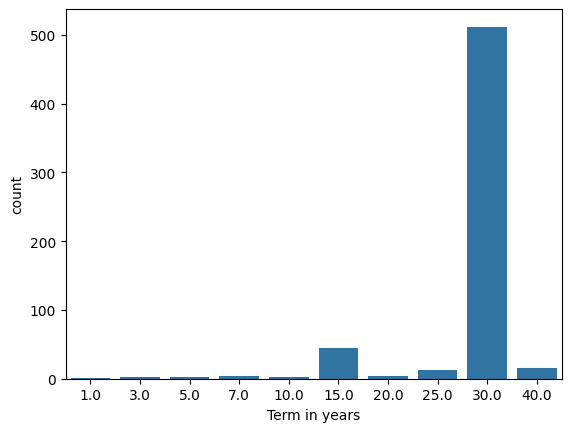

In [44]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

We clearly see that more than 90% of the loans were applied for 30 years.

Now let's see the loan amount variable and how it is distributed.

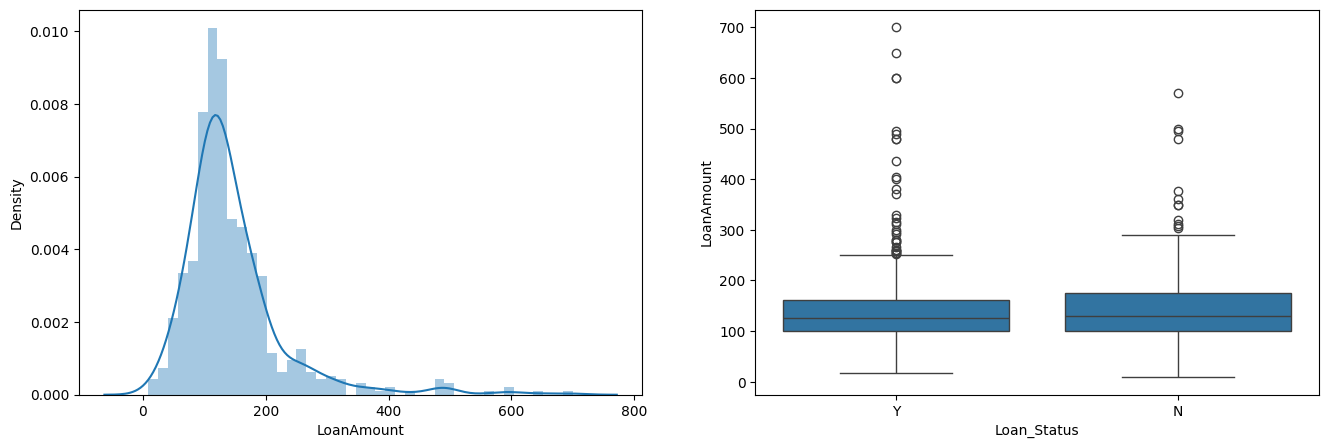

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

We can infer the following:


*   The distribution of loan amount is positively skewed. Most loan amounts fall between 50 to 200. Presence of few very high values (above 400) acting as outliers.
*   For the box plot, the median loan amount for both status is almost the same (around 120 - 130), however both shows significant outliers.
   *   Outliers for approved status go up till above 700.
   *   For rejected status, outliers reach till about 600.

*   Suggests that loan amount alone may not be a strong determinant for loan approval.
*   High loan amounts don't necessarily lead to rejection, as approvals still show high values.



Now let us approximately calculate the loan amount per year, dividing the total loan amount by the loan amount term.

We will ignore the interest rates throughout the process as we have no information about that.

In [46]:
data['Loan_Amount_per_year'] = data['LoanAmount']/data['Loan_Amount_Term']

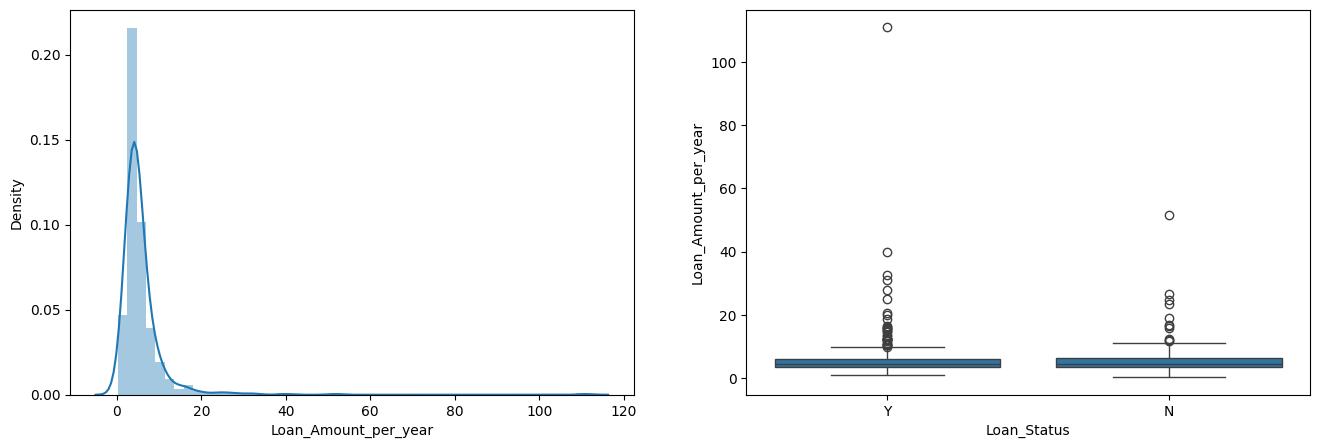

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['Loan_Amount_per_year']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'Loan_Amount_per_year')

plt.show()

From the distribution plot we infer that:


*   It is a highly right skewed dsitribution, with most of the loan amounts per year concentrated on the lower end (0 - 10), and significant density till 20.
*   There are several high values (above 20, till around 120), falling as outliers.
*   Most frequent values seem to be clustered around 2 - 5.


From box plot:


*   Loan approval and rejection show similar medians at around 3 or 4.
*   Extreme values for both the status, approval shown even at around 118.


Overall, most applicants request small loan amount per year.
Approval rate doesn't significantly vary based on the same.





Now, log transforming the two plots for future modelling purposes.

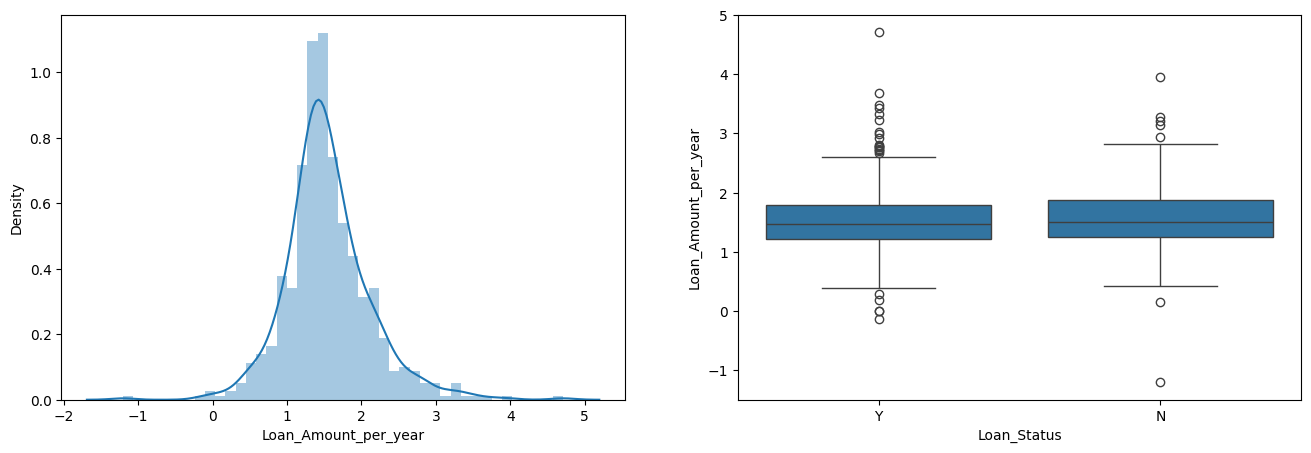

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(121)
log_loanAmount = np.log(data['Loan_Amount_per_year'])
sns.distplot(log_loanAmount)

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = log_loanAmount)

plt.show()

In [49]:
np.log(1.5)

np.float64(0.4054651081081644)

Clearly can see that the most requent loan per year lies at around log(1.5), value provided above.

Now let us calculate the EMI

In [50]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12

Now, let's check whether the applicants are able to afford to pay the EMIs or not.


The ideal threshold of an applicant to be able to afford an EMI would be if the EMI to income ratio of an applicant falls under 30%.

In [51]:
data['EMI_to_Income'] = (data['EMI']/data['TotalIncome'])*100

In [52]:
data['Able_to_pay_EMI'] = (data['EMI_to_Income']<30).astype('int')

In [53]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,EMI,EMI_to_Income,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,5.837392,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,6.111111,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,6.746273,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,6.527778,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

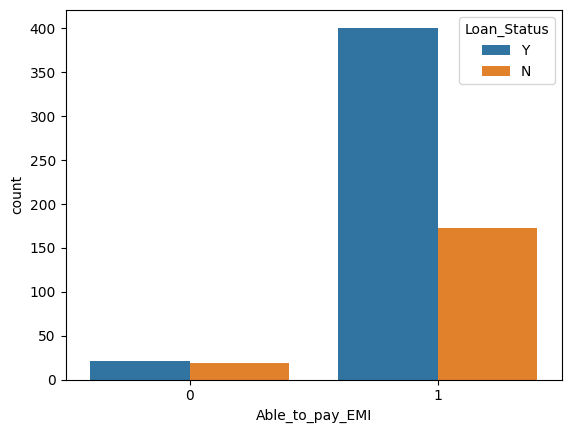

In [54]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

From the above count plot we can infer that:


*   Most of the applicants who get their loans approved are able to pay their EMIs. This suggests that ability to pay EMI is a strong positive indicator for loan approval.
*   There is almost 50% chance that an applicant may get approved for loan if he is not able to pay the EMI. Though the count is significantly low.



# Dependents and Loan Approval

In [55]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [56]:
data['Dependents'].replace('3+', 3, inplace=True)

In [57]:
data['Dependents'] = data['Dependents'].astype('float')

In [58]:
data.dtypes

,0
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


<Axes: xlabel='Dependents', ylabel='count'>

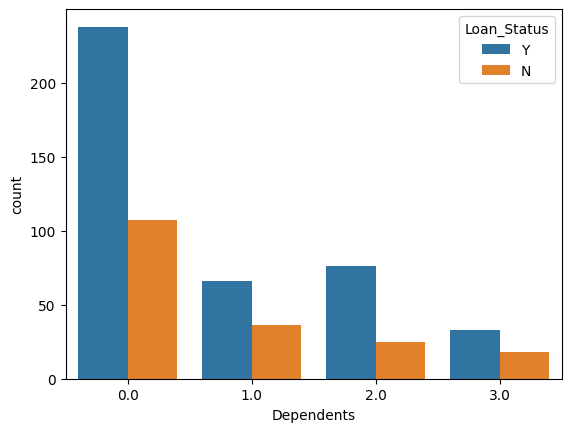

In [59]:
sns.countplot(x='Dependents', data=data, hue='Loan_Status')

We get the following inferences:


*   0 dependents group has the highest number of applicants. A significantly higher number of applicants got their loans approved.
*   Approval rates for applicants with 1 or 2 depedents are still higher that rejections.
*   Applicants with 3+ dependents are the lowest. Approval count is only slightly higher than rejection rate, indicating a decrease in approval rate with increasing number of dependents.


*   Overall, there seems to be a negative correlation between number of dependents and loan approval likelihood.


# Credit History vs Loan Approval

In [60]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [61]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], normalize='index')*100

Loan_Status,N,Y
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947


We can clearly see that 92% of applicants with poor or no credit history gets their loans rejected,



while 79% applicants with good loan history gets their loan approved.

<Axes: xlabel='Credit_History', ylabel='count'>

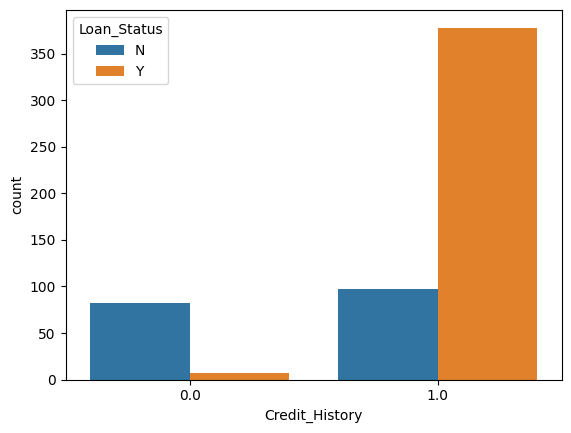

In [62]:
sns.countplot(x='Credit_History', data=data, hue='Loan_Status')

We can clearly see that credit history is a major factor for loan approval decisions.


*   A very high number of applicants with a good credit history (1.0) got their loans approved. A noticeable portion also got rejecgted but approvals dominate by a larger margin.
*   A very low number of applicants with poor or no credit history (0.0) got their loans approved, while more were rejected, indicating a strong negative impact of poor credit history with loan approval chances.



# Missing Values and Data Cleaning

In [63]:
data.isna().sum()   #total number of null values in each column

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Now we will form a function to create a dataframe with number and percentage of missing data in the given dataframe.

In [64]:
def missing_to_df(df):
  #number and percentage of missing data in a training dataset for each column
  total_missing_df = df.isnull().sum().sort_values(ascending=False)
  percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
  missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total','Percent'])
  return missing_data_df

In [65]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total']>0]

,Total,Percent
Credit_History,50,8.143322
EMI_to_Income,36,5.863192
Loan_Amount_per_year,36,5.863192
EMI,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


Now that we have determined the number of missing values in each column, we'll perfrom data cleaning.


Firstly, for credit history, let us check the total unique entries in it.

In [66]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [67]:
data['Credit_History'] = data['Credit_History'].fillna(2.0)   #filling the missing values with new category

In [68]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89
2.0,50


Now let's check the same for Self_employed category

In [69]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [70]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')

In [71]:
data['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82
Other,32


Now, for the numerical columns, let us impute the missing values with the median.

In [72]:
from sklearn.impute import SimpleImputer

num_missing = ['EMI_to_Income','Loan_Amount_per_year','EMI','LoanAmount','Loan_Amount_Term']

median_imputer = SimpleImputer(strategy='median')
for col in num_missing:
  data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

Similarly, let us impute the missing values with highest frequency for the categorical columns

In [73]:
cat_missing = ['Gender','Married','Dependents']

freq_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_missing:
  data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [74]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total']>0]

,Total,Percent


As we can see above, we've handled all the missing values from the columns.

# Categorical to Numerical Encoding

In [75]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

**Loan Status**

In [76]:
loan = 'Loan_Status'
data[loan].value_counts()

,count
Loan_Status,
Y,422
N,192


Encoding the loan status with the help of label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[loan] = le.fit_transform(data[loan])

In [78]:
data[loan].value_counts()

,count
Loan_Status,
1,422
0,192


**Gender**

In [79]:
data['Gender'].value_counts()

,count
Gender,
Male,502
Female,112


Encoding gender with label encoding

In [80]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [81]:
data['Gender'].value_counts()

,count
Gender,
1,502
0,112


**Married**

In [82]:
data['Married'].value_counts()

,count
Married,
Yes,401
No,213


Encoding Married with label encoding

In [83]:
le = LabelEncoder()
data['Married'] = le.fit_transform(data['Married'])

In [84]:
data['Married'].value_counts()

,count
Married,
1,401
0,213


**Property Area**

In [85]:
data['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


Since property area has three categories, to avoid any biasness, we will use one hot encoding.

In [86]:
property_dummy = pd.get_dummies(data['Property_Area'], dtype=int)
data = pd.concat([data, property_dummy], axis=1)
data = data.drop(['Property_Area'], axis=1)
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Loan_Amount_per_year,EMI,EMI_to_Income,Able_to_pay_EMI,Rural,Semiurban,Urban
20,1,1,0.0,Not Graduate,No,7660,0.0,104.0,30.0,0.0,0,7660.0,3.466667,288.888889,3.771395,1,0,0,1
103,1,1,0.0,Graduate,No,4652,3583.0,128.0,30.0,1.0,1,8235.0,4.383333,365.277778,6.911199,0,0,1,0
604,0,1,1.0,Graduate,No,12000,0.0,496.0,30.0,1.0,1,12000.0,16.533333,1377.777778,11.481481,1,0,1,0
599,1,1,2.0,Graduate,No,5780,0.0,192.0,30.0,1.0,1,5780.0,6.400000,533.333333,9.227220,1,0,0,1
523,1,1,2.0,Graduate,Yes,7948,7166.0,480.0,30.0,1.0,1,15114.0,16.000000,1333.333333,8.821843,1,1,0,0


**Education**

In [87]:
data['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


Encoding Education with Label encoding

In [88]:
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])

In [89]:
data['Education'].value_counts()

,count
Education,
0,480
1,134


**Self Employed**

In [90]:
data['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82
Other,32


Encoding with Target encoding

In [91]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00


In [92]:
from category_encoders import TargetEncoder

te = TargetEncoder()
data['Self_Employed'] = te.fit_transform(data['Self_Employed'], data['Loan_Status'])
data['Self_Employed'].value_counts()

,count
Self_Employed,
0.686000,500
0.682936,82
0.711469,32


In [93]:
data.dtypes

,0
Gender,int64
Married,int64
Dependents,float64
Education,int64
Self_Employed,float64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


All the columns have been successfully been converted into numeric columns. This will be helpful in finding correlation among them.

# Correlation Coefficients

<Axes: >

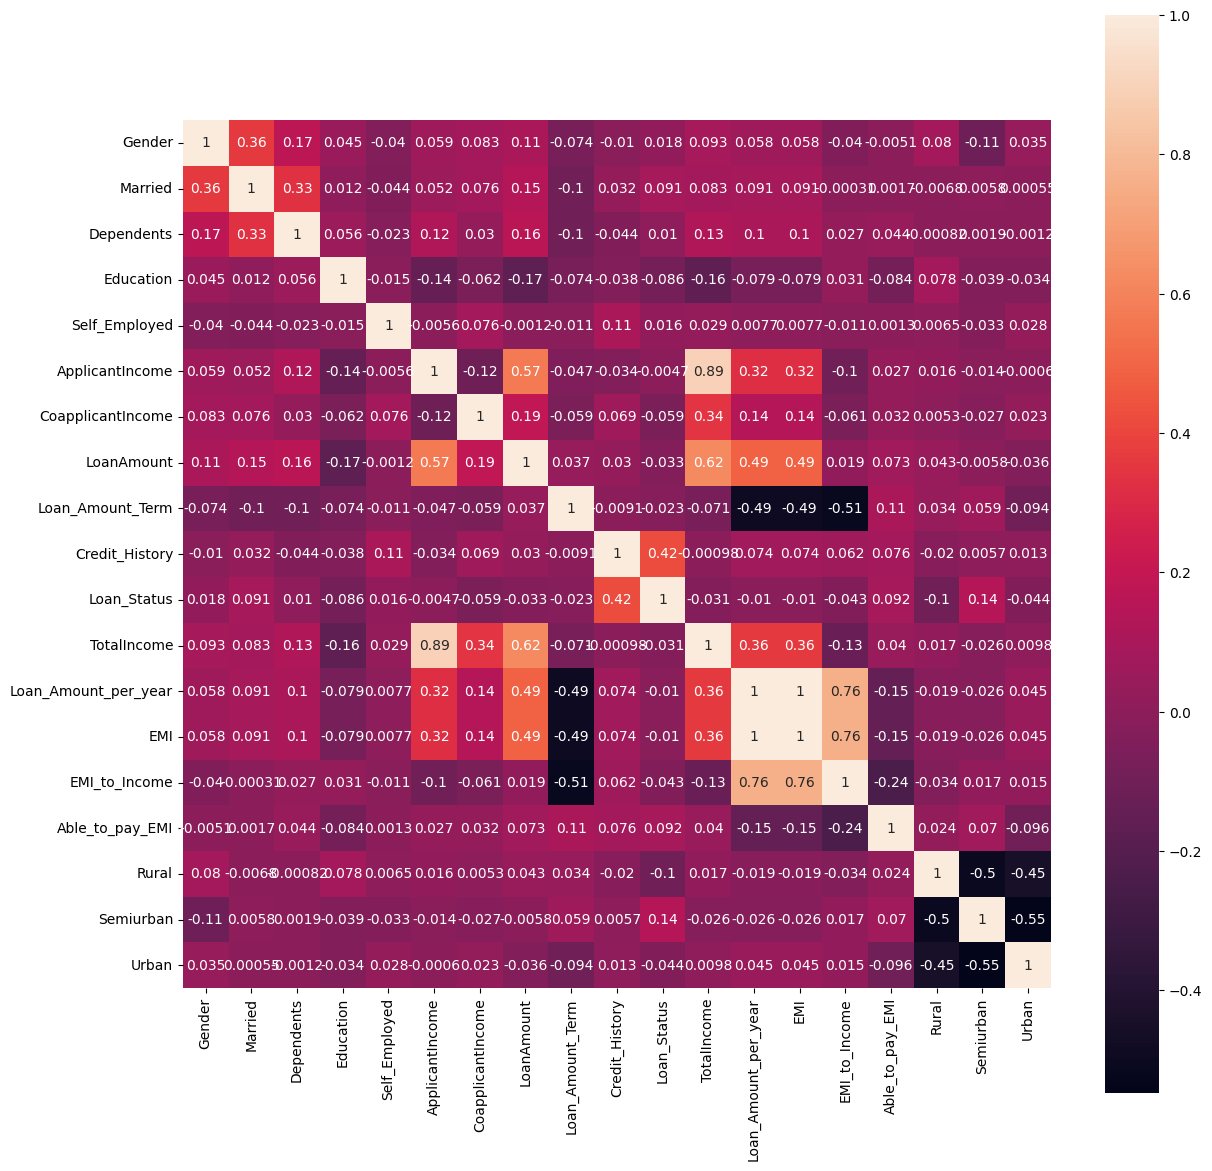

In [94]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True)

From the correlation heat map, it is clear that **Loan Status** has a high correlation (positive) with only **Credit History**. Other factors don't strongly affect the chances of approval or rejection of loan as much as an individual's credit history and score does.

<Axes: xlabel='Credit_History', ylabel='count'>

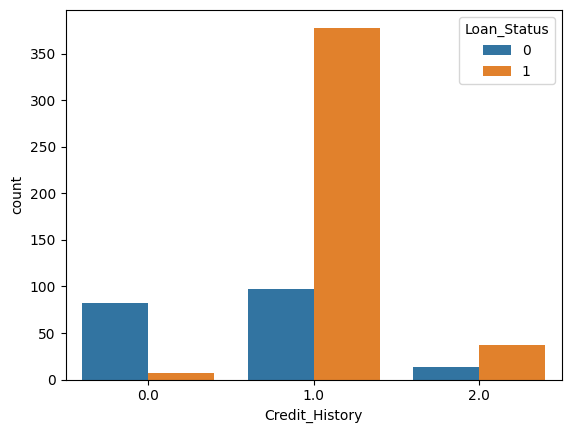

In [95]:
sns.countplot(x='Credit_History', data=data, hue='Loan_Status')

In [96]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], normalize='index')*100

Loan_Status,0,1
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947
2.0,26.000000,74.000000


As we can clearly see:


*   An individual who has a good credit history and score (indicated by 1.0), has a 79.5% chance that his loan gets approved.
*   Whereas, an individual with poor or low credit score and history (indicated by 0.0) comes under a staggering 92% chance that his loan will get rejected.

